In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [2]:
img = cv2.imread('k.jpg',0)

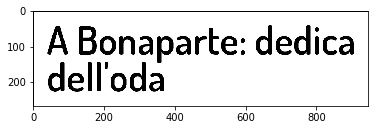

In [3]:
plt.imshow(img,cmap='gray')
plt.show()

In [4]:
img.size

253528

In [5]:
img.shape

(268, 946)

In [6]:
# the (5,5) is kernel/filter size. So can try different sizes.
blur = cv2.GaussianBlur(img,(5,5),0)

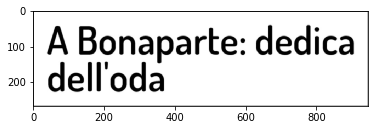

In [7]:
plt.imshow(blur,cmap='gray')
plt.show()

In [8]:
# apply thresholding
th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,75,10)

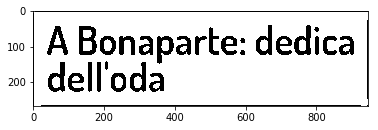

In [9]:
plt.imshow(th,cmap='gray')
plt.show()

In [10]:
# invert colors (opencv requirement)
# convert white to black, vice versa
img_bn = cv2.bitwise_not(th)

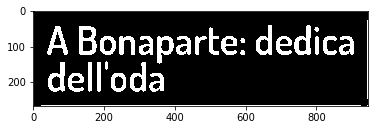

In [11]:
plt.imshow(img_bn,cmap='gray')
plt.show()

In [12]:
con2, hier2 = cv2.findContours(img_bn, cv2.RETR_EXTERNAL, cv2.cv2.CHAIN_APPROX_SIMPLE)
# con, hier = cv2.findContours(img_bn, cv2.RETR_EXTERNAL, cv2.cv2.CHAIN_APPROX_SIMPLE)

In [13]:
len(con2)

29

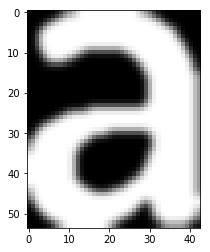

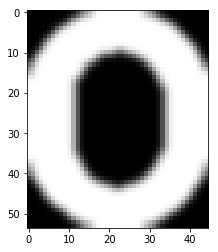

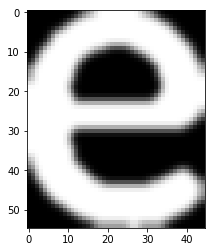

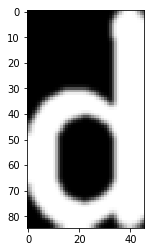

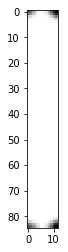

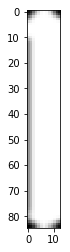

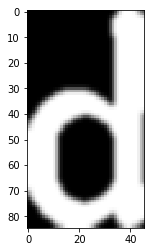

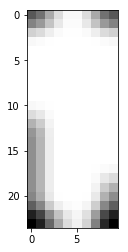

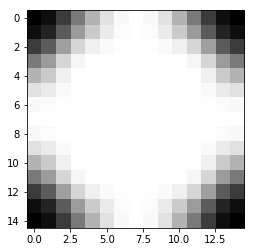

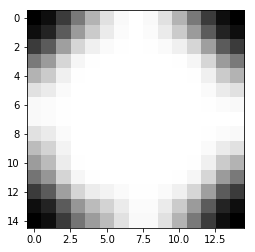

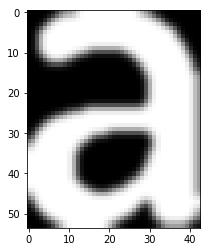

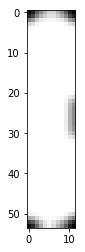

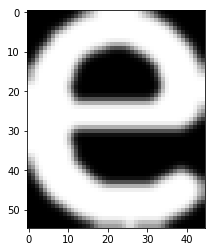

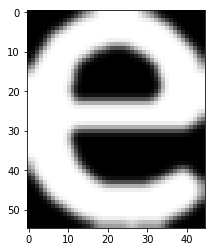

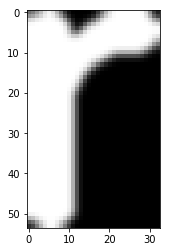

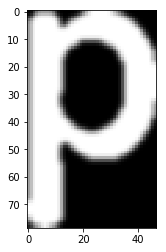

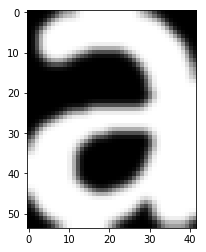

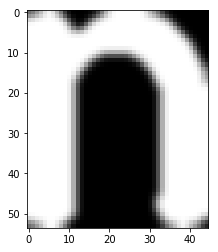

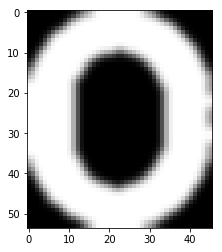

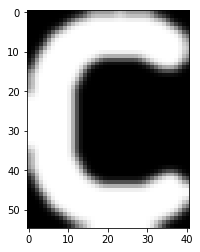

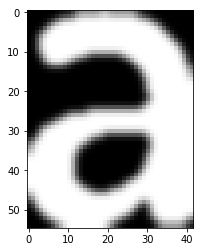

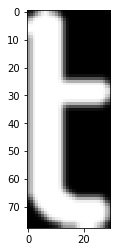

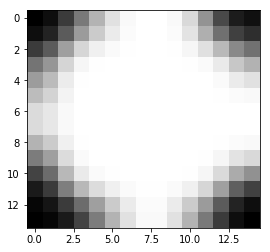

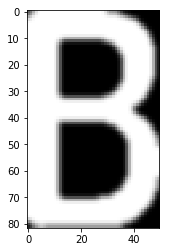

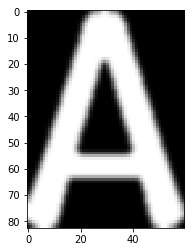

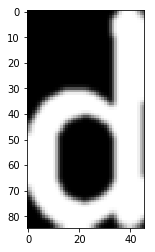

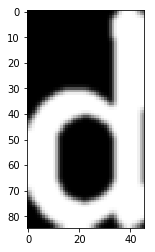

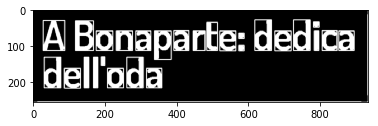

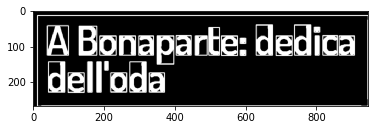

In [14]:
k = 1
for cont in con2:
    [x,y,w,h] = cv2.boundingRect(cont)
    cropped = img_bn[y :y +  h , x : x + w]
    blur1 = cv2.GaussianBlur(cropped,(5,5),0)
    plt.imshow(blur1,cmap='gray')
    plt.show()
    s = ("blur_cropped_{}_.jpg".format(k))
    cv2.imwrite(s , cropped)
    k += 1
    cv2.rectangle(img_bn,(x,y),(x+w,y+h),(255,255,255),2)